### Nama : Shafira Fimelita Qathrunnada
### NPM  : 51421412

# Bussiness Understanding
## Problem Statements
- Bagaimana mengetahui faktor-faktor yang dapat mempengaruhi popularitas lagu di platform musik seperti Spotify?
- Bagaimana menghasilkan performa model yang seakurat mungkin untuk memprediksi jumlah streaming lagu?

## Goals
- Untuk mengetahui faktor-faktor yang mempengaruhi popularitas lagu, seperti genre, akustik, dan elemen musik lainnya.
- Menghasilkan model machine learning yang dapat memprediksi jumlah streaming lagu dengan seakurat mungkin, yang dapat digunakan sebagai acuan dalam strategi pemasaran dan pengembangan lagu.

## Solution Statements
Untuk mengetahui faktor-faktor yang mempengaruhi popularitas lagu, dilakukan langkah-langkah berikut:
- Melakukan Exploratory Data Analysis (EDA) untuk mendapatkan wawasan informasi yang dibutuhkan. Ini mencakup visualisasi data fitur terhadap target dalam hal ini, fitur-fitur yang terdapat pada dataset dan jumlah streaming sebagai data target.
- Menggunakan feature importance untuk menilai seberapa berguna fitur dalam memprediksi jumlah streaming. Ini akan memberikan wawasan tentang data dan membantu dalam pengurangan dimensi serta pemilihan fitur yang meningkatkan efisiensi model.

Untuk menghasilkan model machine learning yang seakurat mungkin dalam memprediksi jumlah streaming, tiga algoritma regresi dapat digunakan:
- Linear Regression: Model statistik sederhana yang digunakan untuk memprediksi dengan menemukan garis terbaik yang memisahkan variabel independen dan dependen. Kelebihannya adalah mudah diimplementasikan, tetapi dapat overfit dan tidak cocok untuk hubungan non-linier.
- Polynomial Regression: Metode yang mencari hubungan non-linier antara variabel, dengan menggunakan fungsi kuadratik. Jika model linear tidak cukup fit, maka pendekatan polinomial bisa dicoba untuk menangkap pola yang lebih kompleks dalam data.
- Random Forest: Algoritma supervised learning yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Kelebihan dari Random Forest termasuk kemampuan untuk menangani dataset besar dan memberikan estimasi pentingnya variabel, tetapi waktu pemrosesan bisa lebih lama dan interpretasinya lebih sulit.

# Data Understanding

In [1]:
#Import Library
import pandas as pd

In [2]:
# Memuat Data
df = pd.read_csv('spotify_streamed_song.csv')

### Menelaah Data dengan Metode Statistik

In [3]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [4]:
# Menampilkan 5 baris terakhir dari dataset
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,https://i.scdn.co/image/ab67616d0000b273992a1f...


In [5]:
# Mengetahui jumlah baris dan kolom memanfaatkan fungsi shape
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Kolom : ", df.shape[1])

Jumlah Baris :  953
Jumlah Kolom :  25


In [6]:
# Mengetahui tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
# Menampilkan statistik
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [8]:
# Menampilkan statistik kolom baik yang bertipe numerik dan non numerik menggunakan fungsi describe
df.describe(include='all')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,...,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,...,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,...,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Found
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,...,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,NaN
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,...,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,NaN
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,...,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,NaN
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,...,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,NaN
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,...,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,NaN
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,...,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,NaN


In [9]:
import warnings
warnings.filterwarnings("ignore")

### Mendeteksi Outliers

In [10]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

artist_count               1.0
released_year              2.0
released_month             6.0
released_day              16.0
in_spotify_playlists    4667.0
in_spotify_charts         16.0
in_apple_playlists        75.0
in_apple_charts           80.0
in_deezer_charts           2.0
bpm                       40.0
danceability_%            21.0
valence_%                 38.0
energy_%                  24.0
acousticness_%            37.0
instrumentalness_%         0.0
liveness_%                14.0
speechiness_%              7.0
dtype: float64

In [11]:
# Melihat batas bawah/minimum dari Interquartile Range (IQR)
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

artist_count              -0.5
released_year           2017.0
released_month            -6.0
released_day             -18.0
in_spotify_playlists   -6125.5
in_spotify_charts        -24.0
in_apple_playlists       -99.5
in_apple_charts         -113.0
in_deezer_charts          -3.0
bpm                       40.0
danceability_%            25.5
valence_%                -25.0
energy_%                  17.0
acousticness_%           -49.5
instrumentalness_%         0.0
liveness_%               -11.0
speechiness_%             -6.5
dtype: float64

In [12]:
# Melihat batas atas/maksimum dari Interquartile Range (IQR)
batas_atas = q3 + (1.5 * iqr)
batas_atas

artist_count                3.5
released_year            2025.0
released_month             18.0
released_day               46.0
in_spotify_playlists    12542.5
in_spotify_charts          40.0
in_apple_playlists        200.5
in_apple_charts           207.0
in_deezer_charts            5.0
bpm                       200.0
danceability_%            109.5
valence_%                 127.0
energy_%                  113.0
acousticness_%             98.5
instrumentalness_%          0.0
liveness_%                 45.0
speechiness_%              21.5
dtype: float64

In [13]:
# Menampung kolom dengan tipe data selain object
df_ex_object = df.select_dtypes(exclude=['object'])

In [14]:
outlier_filter = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 - 1.5 * iqr)
outlier_filter

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
3,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True
949,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True
950,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
951,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True


In [15]:
# Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = (df_ex_object < batas_bawah) | (df_ex_object > batas_atas)
outlier_filter

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :

    # Exclude kolom dengan tipe data object
    if df[col].dtype != object:
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())

Nama Kolom: artist_count
artist_count
False    926
True      27
Name: count, dtype: int64
Nama Kolom: released_year
released_year
False    802
True     151
Name: count, dtype: int64
Nama Kolom: released_month
released_month
False    953
Name: count, dtype: int64
Nama Kolom: released_day
released_day
False    953
Name: count, dtype: int64
Nama Kolom: in_spotify_playlists
in_spotify_playlists
False    844
True     109
Name: count, dtype: int64
Nama Kolom: in_spotify_charts
in_spotify_charts
False    875
True      78
Name: count, dtype: int64
Nama Kolom: in_apple_playlists
in_apple_playlists
False    875
True      78
Name: count, dtype: int64
Nama Kolom: in_apple_charts
in_apple_charts
False    944
True       9
Name: count, dtype: int64
Nama Kolom: in_deezer_charts
in_deezer_charts
False    810
True     143
Name: count, dtype: int64
Nama Kolom: bpm
bpm
False    948
True       5
Name: count, dtype: int64
Nama Kolom: danceability_%
danceability_%
False    950
True       3
Name: count, dtype

In [17]:
# Persentase Outliers
length_outliers_percentage = len(df[outlier_filter]) / len(df['streams']) * 100
print('Persentase Outliers untuk Streams:', length_outliers_percentage)

Persentase Outliers untuk Streams: 100.0


In [18]:
# Ubah 'streams', 'in_deezer_playlists', and 'in_shazam_charts' ke numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [19]:
# Standar deviasi jumlah streaming masing-masing artis
std_streams_per_artist = df.groupby('artist(s)_name')['streams'].std()
print(std_streams_per_artist)

artist(s)_name
(G)I-DLE                                         5.263409e+07
21 Savage, Gunna                                          NaN
24kgoldn, Iann Dior                                       NaN
50 Cent                                                   NaN
A$AP Rocky, Metro Boomin, Roisee                          NaN
                                                     ...     
j-hope                                                    NaN
j-hope, J. Cole                                           NaN
sped up 8282                                              NaN
sped up nightcore, ARIZONATEARS, Lil Uzi Vert             NaN
teto                                                      NaN
Name: streams, Length: 645, dtype: float64


In [20]:
# Jumlah lagu di chart untuk masing-masing artis
songs_in_chart_per_artist = df.groupby('artist(s)_name')['in_spotify_charts'].sum()
print(songs_in_chart_per_artist)

artist(s)_name
(G)I-DLE                                         39
21 Savage, Gunna                                  0
24kgoldn, Iann Dior                               0
50 Cent                                           7
A$AP Rocky, Metro Boomin, Roisee                 16
                                                 ..
j-hope                                            0
j-hope, J. Cole                                   2
sped up 8282                                      2
sped up nightcore, ARIZONATEARS, Lil Uzi Vert    10
teto                                              2
Name: in_spotify_charts, Length: 645, dtype: int64


In [21]:
# Jumlah lagu di chart berdasarkan tahun rilis
songs_in_chart_per_year = df.groupby('released_year')['in_spotify_charts'].sum()
print(songs_in_chart_per_year)


released_year
1930       0
1942       0
1946       0
1950       0
1952       0
1957       0
1958       0
1959       0
1963       0
1968      14
1970       0
1971       0
1973       0
1975      58
1979       0
1982       0
1983      19
1984      17
1985      25
1986       0
1987       1
1991       9
1992       7
1994       0
1995      17
1996       0
1997       2
1998       9
1999      43
2000      37
2002      91
2003      20
2004      97
2005       0
2007      25
2008      96
2010     129
2011     214
2012     297
2013     280
2014     210
2015     114
2016     286
2017     303
2018     195
2019     365
2020     338
2021     672
2022    3239
2023    4216
Name: in_spotify_charts, dtype: int64


### Menelaah Data dengan Metode Visualisasi

In [22]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

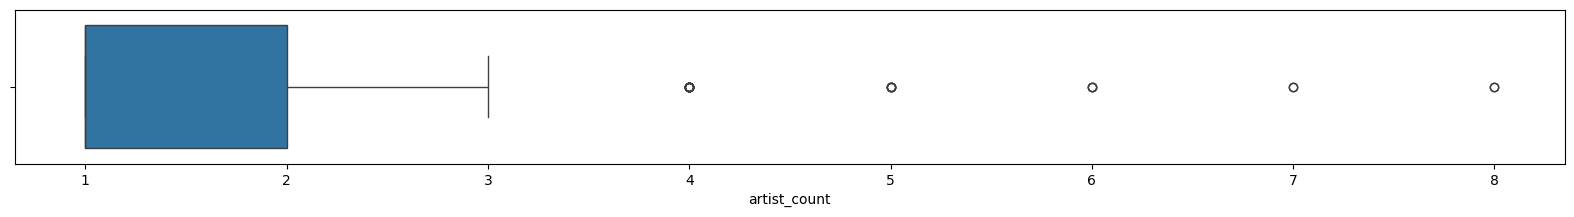

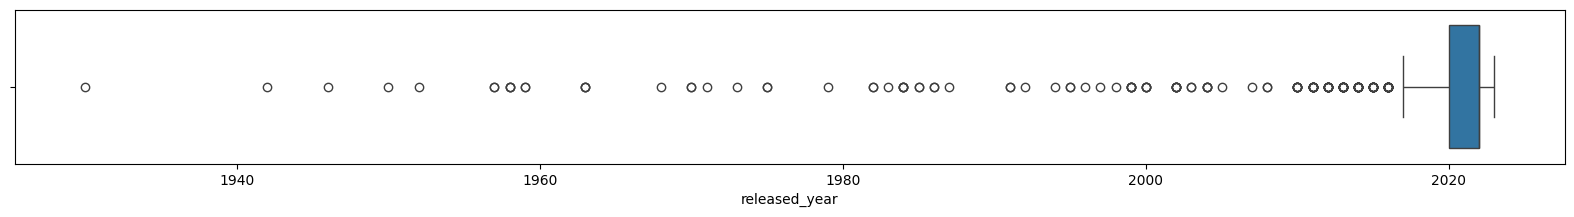

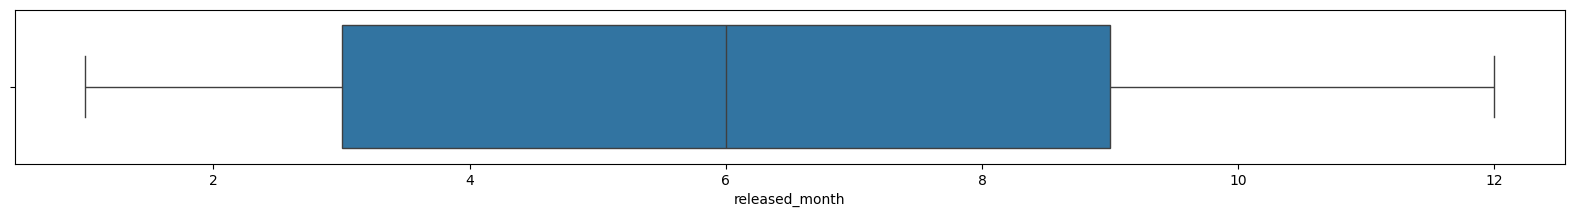

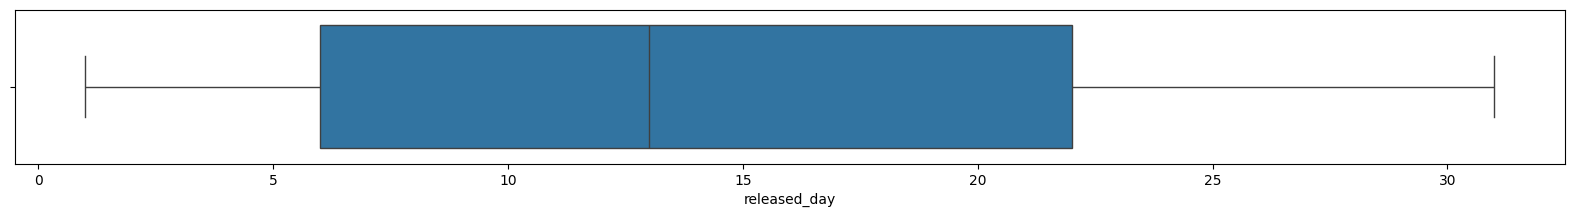

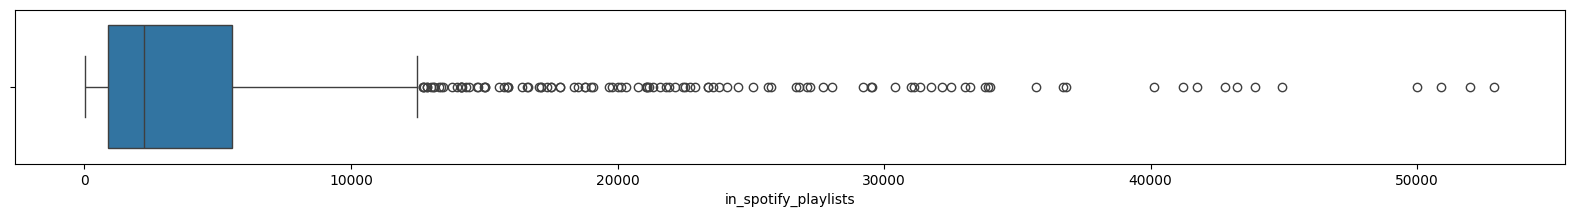

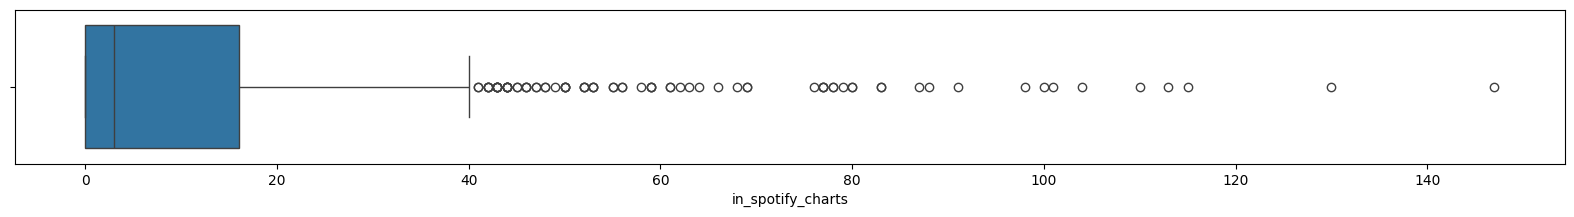

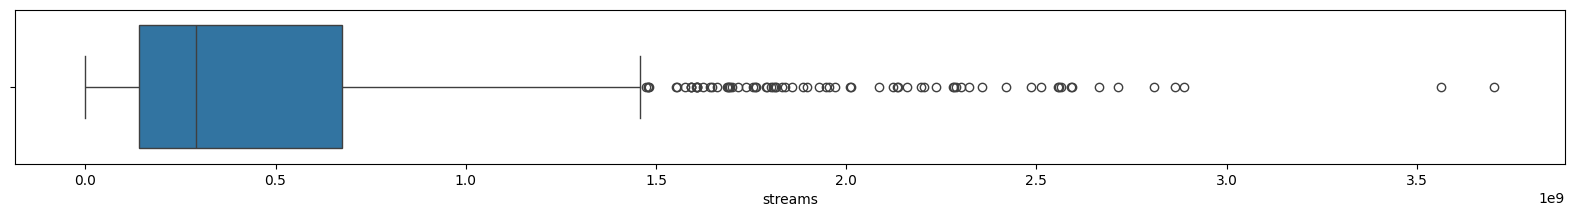

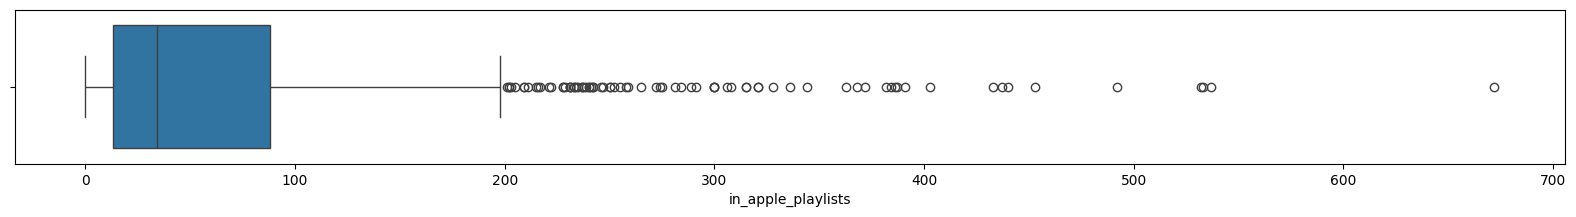

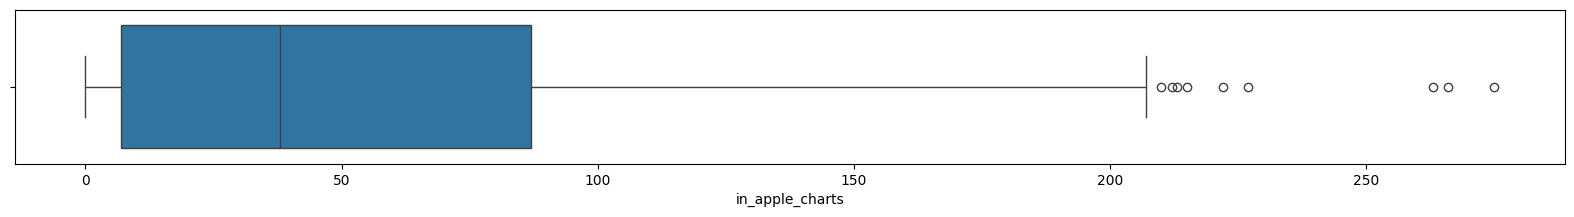

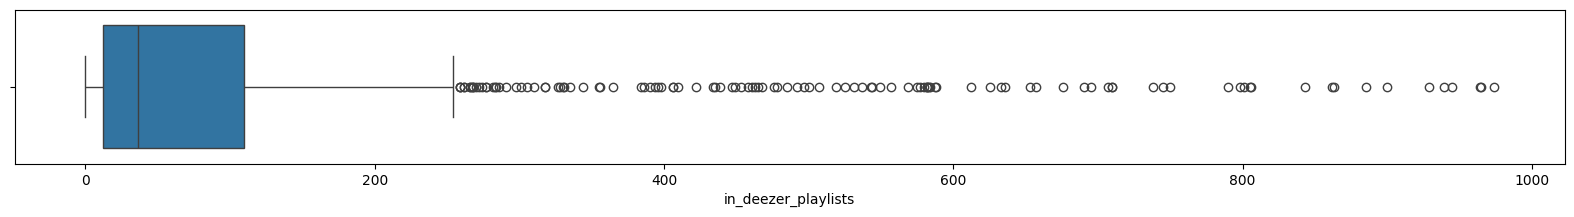

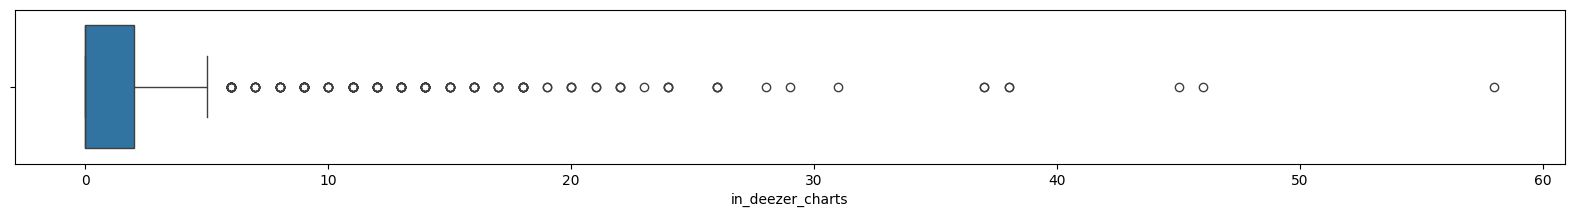

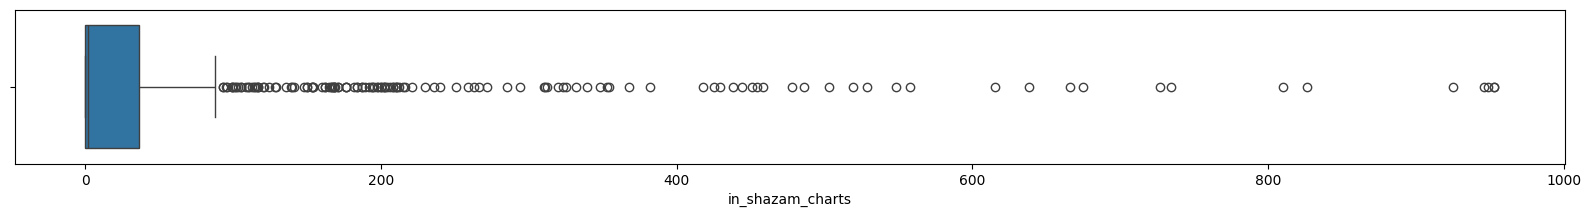

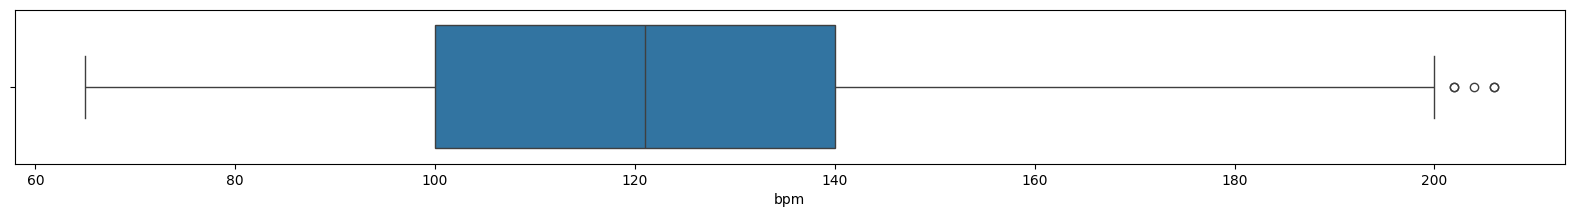

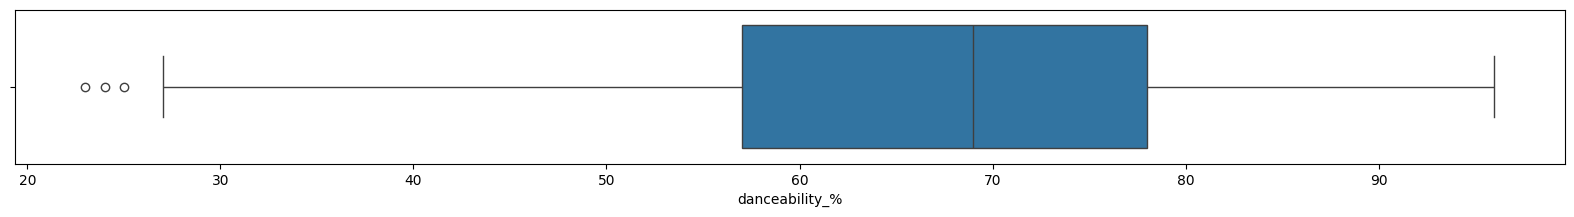

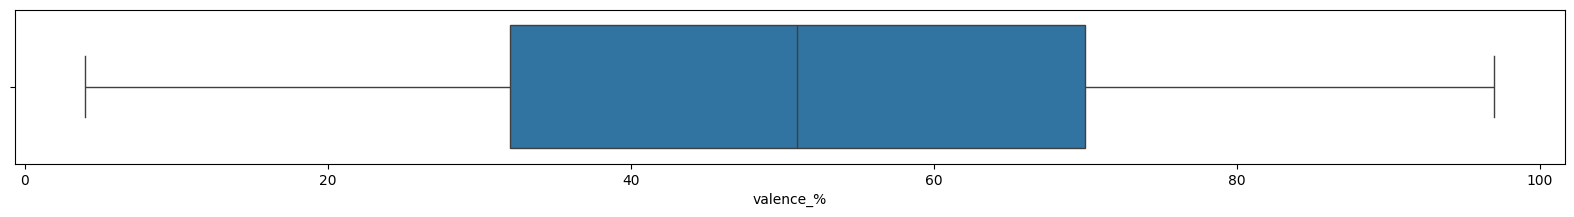

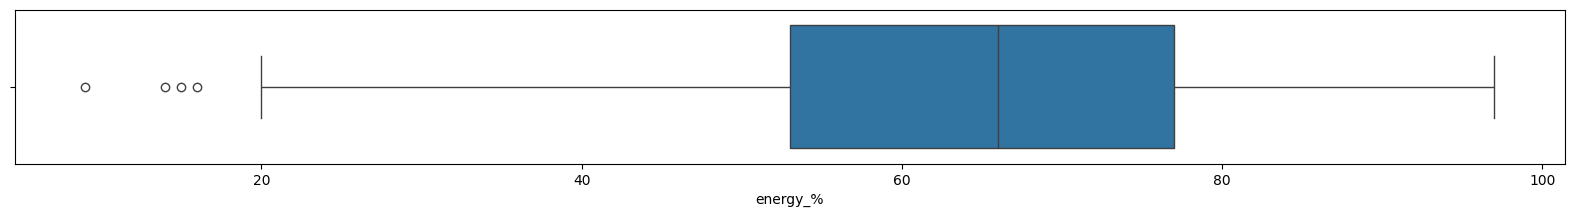

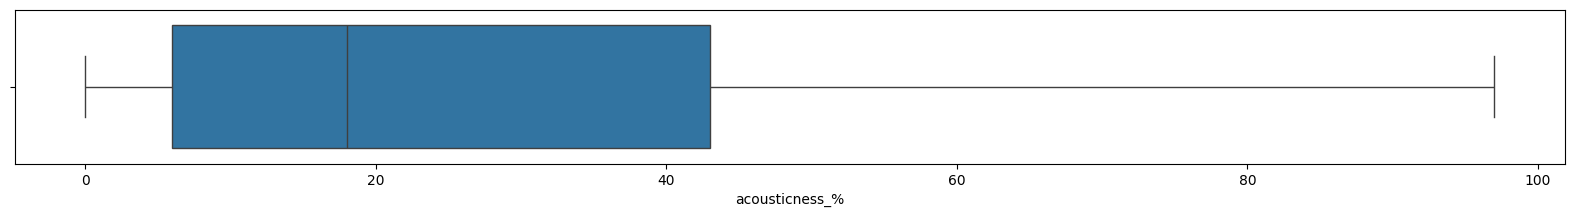

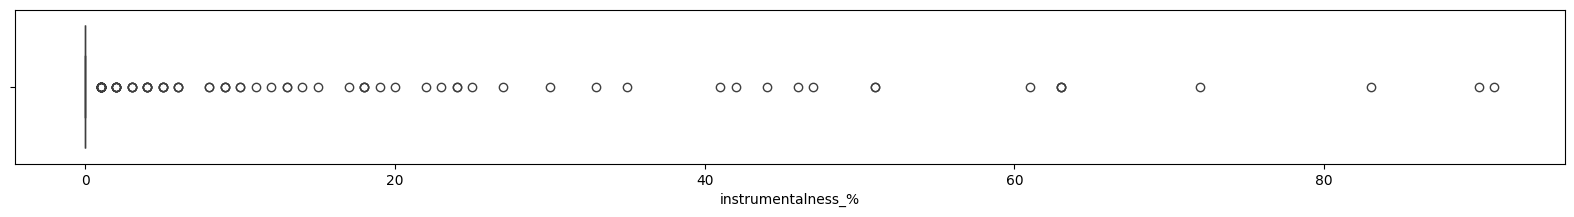

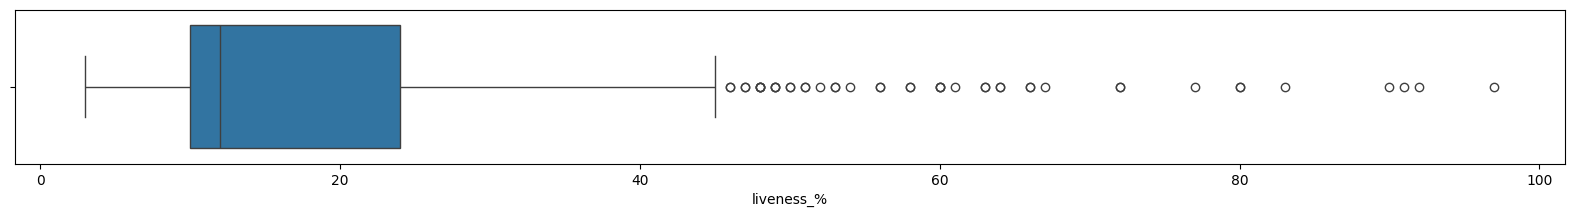

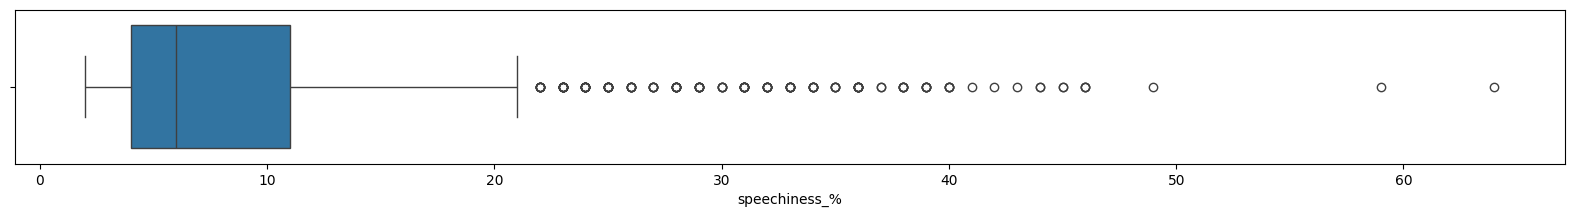

In [23]:
# Mencari Outliers - Boxplot

# Exclude tipe data object
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

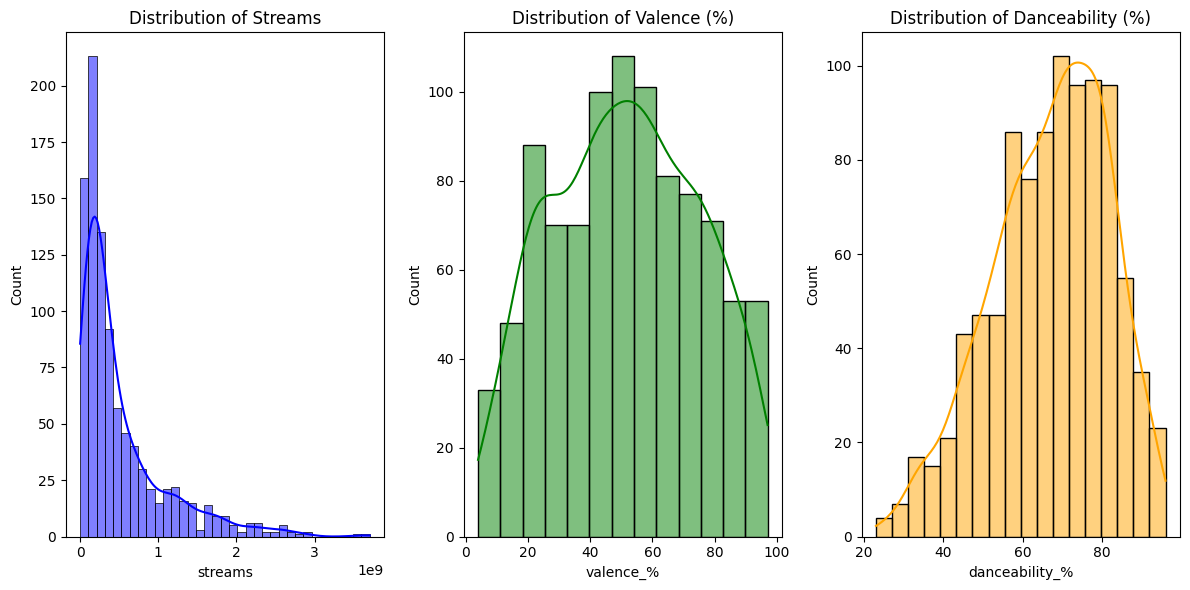

In [24]:
# Visualisasi distribusi variabel numerik penting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['streams'], kde=True, color='blue')
plt.title('Distribution of Streams')

plt.subplot(1, 3, 2)
sns.histplot(df['valence_%'], kde=True, color='green')
plt.title('Distribution of Valence (%)')

plt.subplot(1, 3, 3)
sns.histplot(df['danceability_%'], kde=True, color='orange')
plt.title('Distribution of Danceability (%)')

plt.tight_layout()
plt.show()

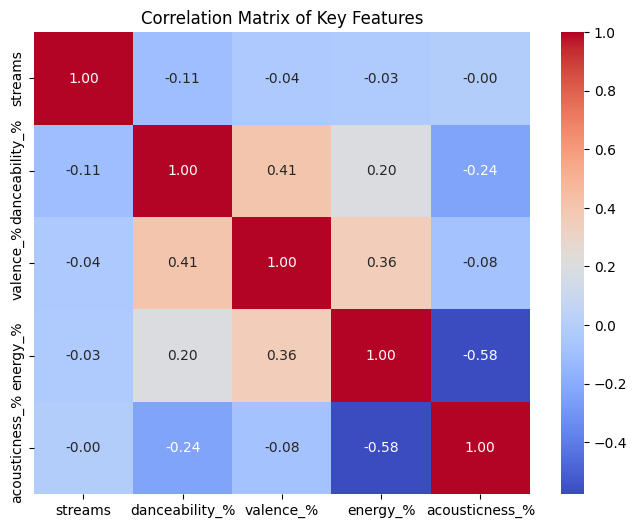

In [25]:
# Korelasi antar variabel
correlation_matrix = df[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Features')
plt.show()

# Data Preparation

In [26]:
# Memuat Data
df = pd.read_csv('spotify_streamed_song.csv')

In [27]:
# Menampilkan 5 baris teratas dari dataset
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


## Data cleansing
### Membuang kolom

In [28]:
# Menghapus Data yang Tidak Relevan
df.drop(['cover_url', 'artist_count'], axis=1, inplace=True)

In [29]:
df.head()

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


#### Data cleansing - Mengubah indeks di dataframe
Karena tidak ada kolom yang bernilai unik pada dataframe, maka kita perlu membuat kolom unik terlebih dahulu dan menjadikan kolom tersebut sebagai index dengan numpy

In [30]:
#Import Library
import numpy as np

In [31]:
unique_id = np.random.choice(len(df),size=len(df),replace=False)

In [32]:
df['unique_id'] = unique_id

In [33]:
df['unique_id'].is_unique

True

In [34]:
df.set_index('unique_id')

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
unique_id,,,,,,,,,,,,,,,,,,,,,
268,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
714,LALA,Myke Towers,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
20,vampire,Olivia Rodrigo,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
647,Cruel Summer,Taylor Swift,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
307,WHERE SHE GOES,Bad Bunny,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,My Mind & Me,Selena Gomez,2022,11,3,953,0,91473363,61,13,...,144,A,Major,60,24,39,57,0,8,3
845,Bigger Than The Whole Sky,Taylor Swift,2022,10,21,1180,0,121871870,4,0,...,166,F#,Major,42,7,24,83,1,12,6
160,A Veces (feat. Feid),"Feid, Paulo Londra",2022,11,3,573,0,73513683,2,0,...,92,C#,Major,80,81,67,4,0,8,6


#### Data cleansing - Merapikan *Fields* dalam data

In [35]:
# Menghapus Duplikasi Data
df.drop_duplicates()

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,unique_id
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,553,147,141381703,43,263,...,B,Major,80,89,83,31,0,8,4,268
1,LALA,Myke Towers,2023,3,23,1474,48,133716286,48,126,...,C#,Major,71,61,74,7,0,10,4,714
2,vampire,Olivia Rodrigo,2023,6,30,1397,113,140003974,94,207,...,F,Major,51,32,53,17,0,31,6,20
3,Cruel Summer,Taylor Swift,2019,8,23,7858,100,800840817,116,207,...,A,Major,55,58,72,11,0,11,15,647
4,WHERE SHE GOES,Bad Bunny,2023,5,18,3133,50,303236322,84,133,...,A,Minor,65,23,80,14,63,11,6,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,2022,11,3,953,0,91473363,61,13,...,A,Major,60,24,39,57,0,8,3,143
949,Bigger Than The Whole Sky,Taylor Swift,2022,10,21,1180,0,121871870,4,0,...,F#,Major,42,7,24,83,1,12,6,845
950,A Veces (feat. Feid),"Feid, Paulo Londra",2022,11,3,573,0,73513683,2,0,...,C#,Major,80,81,67,4,0,8,6,160
951,En La De Ella,"Feid, Sech, Jhayco",2022,10,20,1320,0,133895612,29,26,...,C#,Major,82,67,77,8,0,12,5,693


In [36]:
print(df.columns)

Index(['track_name', 'artist(s)_name', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'unique_id'],
      dtype='object')


In [37]:
# Menghitung jumlah streaming terbanyak per bulan
monthly_streams = df.groupby('released_month')['streams'].sum().reset_index()
monthly_streams.columns = ['released_month', 'total_streams']
monthly_streams_sorted = monthly_streams.sort_values(by='total_streams', ascending=False)

In [38]:
# Menampilkan hasil
print("Jumlah streaming terbanyak per bulan:")
monthly_streams_sorted.head()

Jumlah streaming terbanyak per bulan:


,released_month,total_streams
9,10,9997482772808096550181367366667407271040456283...
7,8,8008408171109433169601863821195353382623557198...
10,11,5705150541647990401370389507428872418146850325...
3,4,5056714383875707421889335021777406666009768481...
1,2,4967956866189903933544954085187451081533720112...


In [39]:
# Mengambil lagu dengan jumlah streaming terbanyak per bulan
top_track_per_month = df.loc[df.groupby('released_month')['streams'].idxmax()][['released_month', 'track_name', 'streams']]

# Menampilkan hasil
print("Lagu dengan jumlah streaming terbanyak per bulan:")
top_track_per_month

Lagu dengan jumlah streaming terbanyak per bulan:


,released_month,track_name,streams
574,1,Love Grows (Where My Rosemary Goes),BPM110KeyAModeMajorDanceability53Valence75Ener...
603,2,HEARTBREAK ANNIVERSARY,951637566
625,3,Arcade,991336132
269,4,Double Fantasy (with Future),96180277
130,5,Queencard,96273746
253,6,Glimpse of Us,988515741
891,7,"Come Back Home - From ""Purple Hearts""",97610446
186,8,Pink + White,806397070
524,9,THATS WHAT I WANT,920797189
33,10,Anti-Hero,999748277


In [40]:
# Jumlah lagu di chart atau playlist berdasarkan bulan
Monthly_Track_in_Charts = df.groupby('released_month').sum()['in_spotify_charts'].reset_index(name='TrackInCharts')
Monthly_Track_in_Charts.head()

,released_month,TrackInCharts
0,1,1535
1,2,846
2,3,1139
3,4,756
4,5,1301


In [41]:
# Ubah 'streams', 'in_deezer_playlists', and 'in_shazam_charts' ke numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

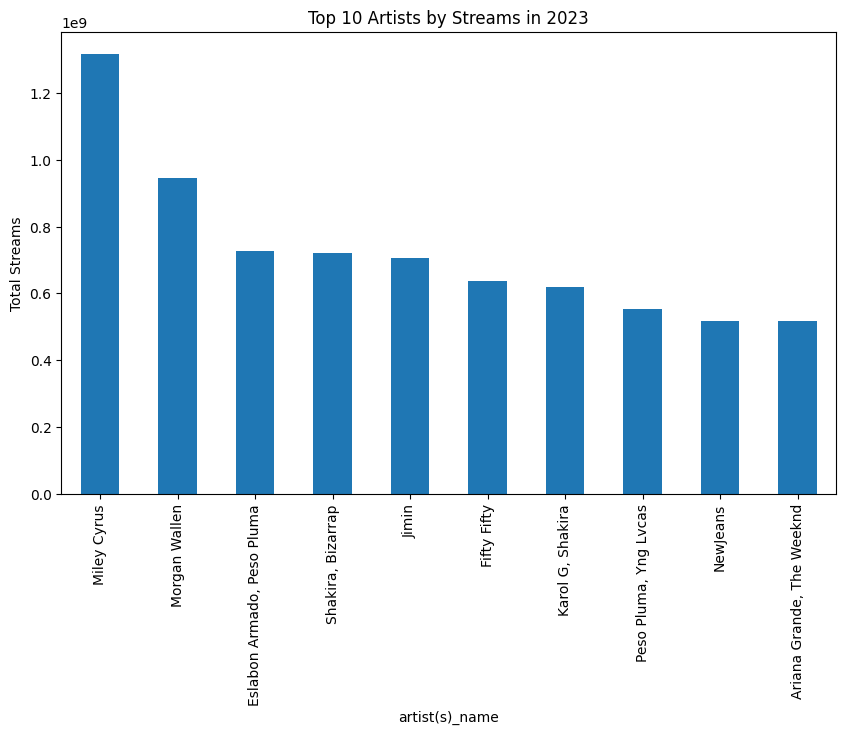

In [42]:
# Filter data untuk tahun 2023
df_2023 = df[df['released_year'] == 2023]

# Total streaming per artist pada tahun 2023
top_artists_streams = df_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Visualisasi 10 artis dengan streaming terbanyak
top_artists_streams.plot(kind='bar', figsize=(10,6), title='Top 10 Artists by Streams in 2023')
plt.ylabel('Total Streams')
plt.show()

In [43]:
# Artis dengan lebih dari satu lagu di chart Spotify dan jumlah streaming mereka
df['in_spotify_charts'] = df['in_spotify_charts'].astype(int)
multiple_chart_artists = df[df['in_spotify_charts'] > 1].groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False)
print(multiple_chart_artists)

artist(s)_name
The Weeknd                                                                               1.211429e+10
Taylor Swift                                                                             1.165770e+10
Ed Sheeran                                                                               1.141201e+10
Bad Bunny                                                                                7.579683e+09
Harry Styles                                                                             6.257159e+09
                                                                                             ...     
Natanael Cano                                                                            3.187354e+07
Mc Pedrinho, DJ 900                                                                      1.195664e+07
Sog, Ryan Castro, Peso Pluma                                                             1.159939e+07
Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vishal-Shekhar, Shekha

<Figure size 1000x600 with 0 Axes>

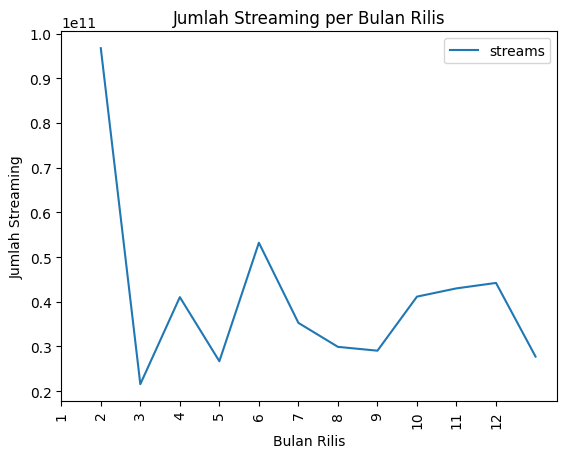

In [44]:
import matplotlib.pyplot as plt

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Melakukan plot data jumlah streaming per bulan
monthly_streams = df.groupby('released_month')['streams'].sum().reset_index()
monthly_streams.set_index('released_month', inplace=True)  # Menjadikan 'released_month' sebagai index
monthly_streams.plot()

# Mengatur label sumbu x
ticks = range(0, len(monthly_streams), 1)   # Menentukan posisi label setiap bulan
labels = monthly_streams.index[ticks]  # Mengambil label berdasarkan posisi
plt.xticks(ticks, labels)  # Mengatur posisi dan label pada sumbu x
plt.xticks(rotation=90)  # Mengatur posisi rotasi label 90 derajat pada sumbu x

# Mengatur label sumbu x, y dan judul grafik
plt.xlabel('Bulan Rilis')
plt.ylabel('Jumlah Streaming')
plt.title('Jumlah Streaming per Bulan Rilis')

# Menampilkan grafik
plt.show()


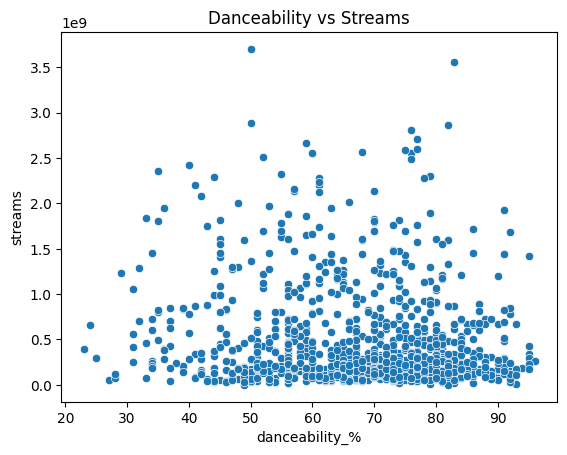

In [45]:
import seaborn as sns

# Danceability vs Streams
sns.scatterplot(x='danceability_%', y='streams', data=df)
plt.title('Danceability vs Streams')
plt.show()

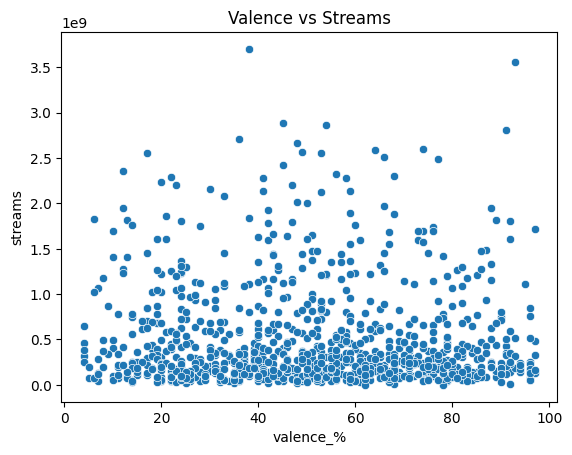

In [46]:
# Valence vs Streams
sns.scatterplot(x='valence_%', y='streams', data=df)
plt.title('Valence vs Streams')
plt.show()

in_spotify_playlists
31        9.0
34       79.0
58       33.0
67       26.0
77       51.0
         ... 
44927     2.0
49991     0.0
50887     0.0
51979     0.0
52898     4.0
Name: acousticness_%, Length: 879, dtype: float64


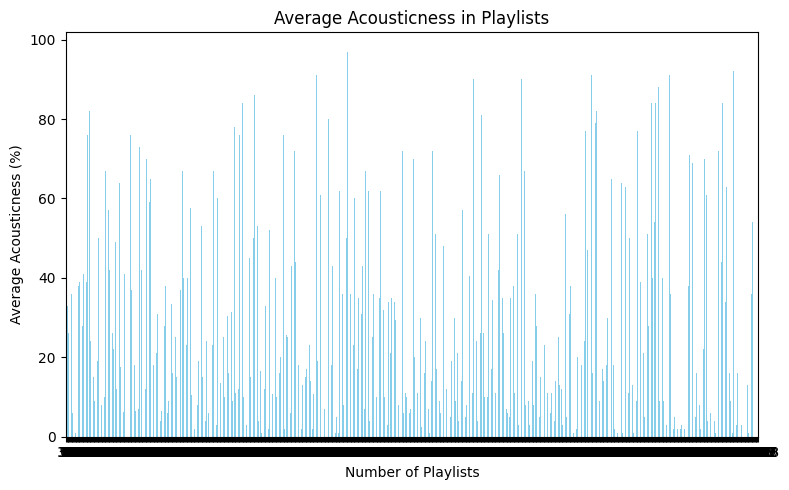

In [47]:
# Mengonversi kolom 'in_spotify_playlists' menjadi integer (jika belum)
df['in_spotify_playlists'] = df['in_spotify_playlists'].astype(int)

# Menghitung rata-rata acousticness berdasarkan jumlah playlist
acoustic_in_playlists = df.groupby('in_spotify_playlists')['acousticness_%'].mean()
print(acoustic_in_playlists)

# Visualisasi acousticness berdasarkan jumlah playlist
plt.figure(figsize=(8, 5))
acoustic_in_playlists.plot(kind='bar', title='Average Acousticness in Playlists', color='skyblue')
plt.ylabel('Average Acousticness (%)')
plt.xlabel('Number of Playlists')
plt.xticks(rotation=0)  # Memastikan label x tidak miring
plt.tight_layout()  # Menghindari layout yang terpotong
plt.show()


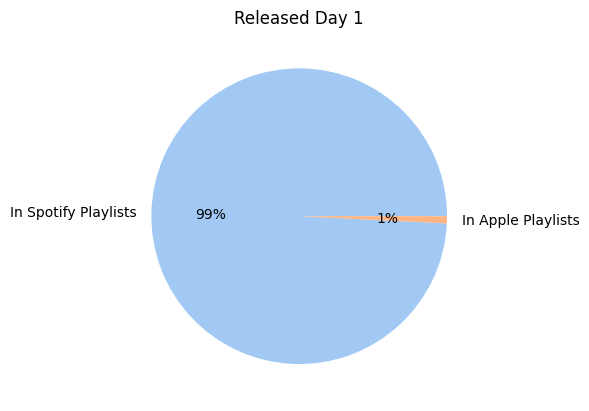

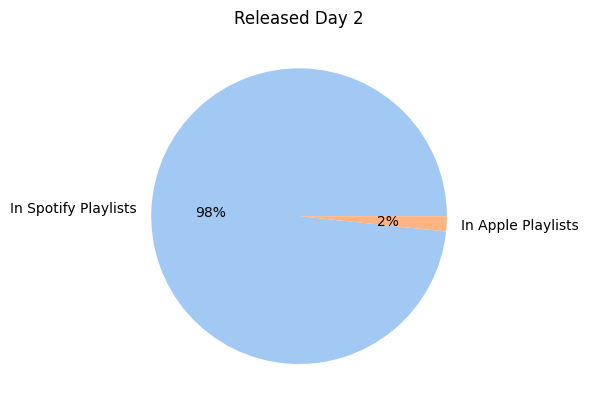

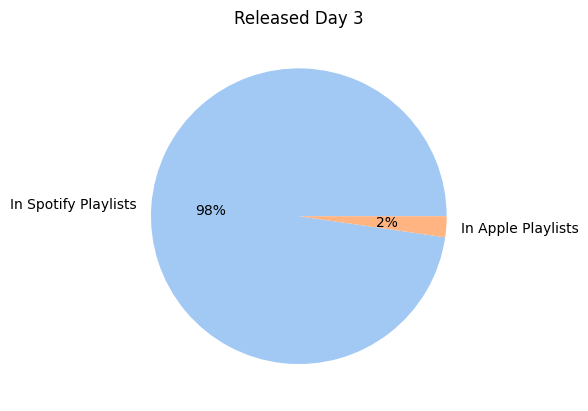

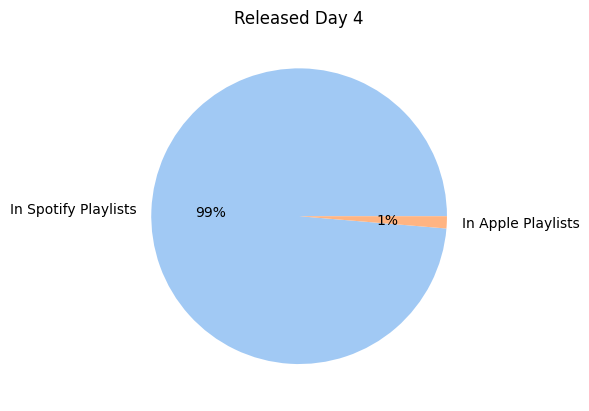

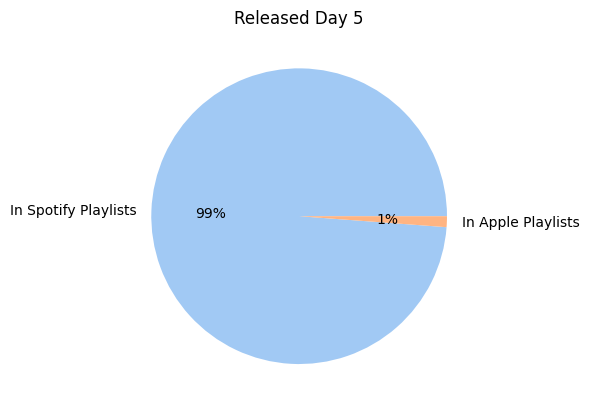

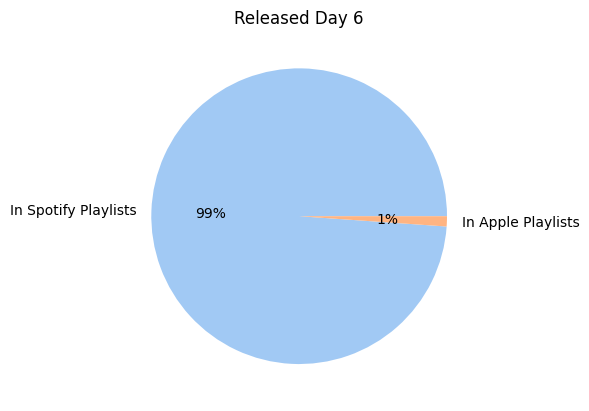

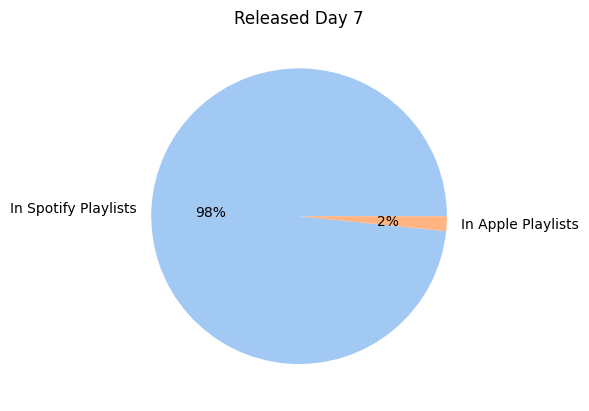

In [48]:
# Menggunakan dataset dan mengelompokkan berdasarkan kolom tertentu
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misalkan kita membagi data ke dalam beberapa grup, seperti lagu yang masuk dalam chart Spotify
delay_per_day = df.groupby('released_day')[['in_spotify_playlists', 'in_apple_playlists']].sum()

# Label Pie Chart
pieChartLabels = ['In Spotify Playlists', 'In Apple Playlists']

# Menentukan warna palet
myColors = sns.color_palette('pastel')

# Menampilkan pie chart per hari berdasarkan tanggal rilis
for i in range(1, 8):
    b = delay_per_day.iloc[i-1, :]  # Mengambil data untuk hari tersebut
    # Membuat pie chart
    plt.pie(b, labels=pieChartLabels, colors=myColors, autopct='%.0f%%')
    plt.title('Released Day ' + str(i))
    plt.show()

## Mengkontruksi Data

#### Imputasi Mean

In [49]:
# Menghitung nilai data yang kosong
df.isna().sum()

track_name               0
artist(s)_name           0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
unique_id                0
dtype: int64

In [50]:
df.dtypes

track_name               object
artist(s)_name           object
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
unique_id                 int64
dtype: object

##### Streams

In [51]:
# Membuat variabel jumlah data yang akan dihapus secara random
jumlah_hapus = 1

In [52]:
# Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df.sample(n=jumlah_hapus).index

In [53]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "streams"
df.loc[indeks_hapus, 'streams'] = None

In [54]:
# Menghitung persentase data yang kosong pada kolom "streams"
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df['streams'].isnull().sum() / df.shape[0]) * 100
print(f"Persentase data kosong pada kolom 'streams': {length_missdata_percentage:.2f}%")

Persentase data kosong pada kolom 'streams': 0.21%


In [55]:
# Melakukan imputasi pada data yang kosong dengan mean
meanImputation = df['streams'].mean()  # Menghitung mean dari kolom streams
print(f"Mean dari kolom 'streams': {meanImputation:.2f}")

Mean dari kolom 'streams': 514349322.40


In [56]:
# Mengisi nilai kosong di kolom 'streams' menggunakan mean
df['streams'].fillna(meanImputation,
                    inplace=True) #Inplace=True berfungsi untuk memodifikasi kolom "streams" secara langsung tanpa membuat copy)

In [57]:
# Mengecek data kosong pada kolom streams
df["streams"].isnull().any()

False

##### in_deezer_playlists 

In [58]:
# Membuat variabel jumlah data yang akan dihapus secara random
jumlah_hapus = 79

In [59]:
# Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df.sample(n=jumlah_hapus).index

In [60]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "in_deezer_playlists"
df.loc[indeks_hapus, 'in_deezer_playlists'] = None

In [61]:
# Menghitung persentase data yang kosong pada kolom "in_deezer_playlists"
length_missdata_percentage = (df['in_deezer_playlists'].isnull().sum() / df.shape[0]) * 100
print(f"Persentase data kosong pada kolom 'in_deezer_playlists': {length_missdata_percentage:.2f}%")

Persentase data kosong pada kolom 'in_deezer_playlists': 16.16%


In [62]:
# Melakukan imputasi pada data yang kosong dengan mean
meanImputation = df['in_deezer_playlists'].mean()  # Menghitung mean dari kolom in_shazam_charts
print(f"Mean dari kolom 'in_deezer_playlists': {meanImputation:.2f}")

Mean dari kolom 'in_deezer_playlists': 108.72


In [63]:
# Mengisi nilai kosong di kolom 'in_deezer_playlists' menggunakan mean
df['in_deezer_playlists'].fillna(meanImputation,
                    inplace=True) #Inplace=True berfungsi untuk memodifikasi kolom "in_shazam_charts" secara langsung tanpa membuat copy)

In [64]:
# Mengecek data kosong pada kolom in_deezer_playlists
df["in_deezer_playlists"].isnull().any()

False

##### in_shazam_charts

In [65]:
# Membuat variabel jumlah data yang akan dihapus secara random
jumlah_hapus = 57

In [66]:
# Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df.sample(n=jumlah_hapus).index

In [67]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "in_shazam_charts"
df.loc[indeks_hapus, 'in_shazam_charts'] = None

In [68]:
# Menghitung persentase data yang kosong pada kolom "in_shazam_charts"
length_missdata_percentage = (df['in_shazam_charts'].isnull().sum() / df.shape[0]) * 100
print(f"Persentase data kosong pada kolom 'in_shazam_charts': {length_missdata_percentage:.2f}%")

Persentase data kosong pada kolom 'in_shazam_charts': 11.12%


In [69]:
# Melakukan imputasi pada data yang kosong dengan mean
meanImputation = df['in_shazam_charts'].mean()  # Menghitung mean dari kolom in_shazam_charts
print(f"Mean dari kolom 'streams': {meanImputation:.2f}")

Mean dari kolom 'streams': 51.29


In [70]:
# Mengisi nilai kosong di kolom 'in_shazam_charts' menggunakan mean
df['in_shazam_charts'].fillna(meanImputation,
                    inplace=True) #Inplace=True berfungsi untuk memodifikasi kolom "in_shazam_charts" secara langsung tanpa membuat copy)

In [71]:
# Mengecek data kosong pada kolom in_shazam_charts
df["in_shazam_charts"].isnull().any()

False

#### Imputasi Tipe data Variabel Kategorikal

In [72]:
# Mengimport Library Numpy dan Sklearn.impute
import numpy as np
from sklearn.impute import SimpleImputer

In [73]:
jumlah_hapus = 95
indeks_hapus = np.random.choice(df.index, jumlah_hapus, replace=False)

In [74]:
# Membuat copy dari kolom 'key'
shazam_column = df["key"].copy()

# Menghapus baris data secara random sesuai variabel dari indeks hapus di atas
shazam_column.loc[indeks_hapus] = np.nan

In [75]:
# Membuat algoritma SimpleImputer dengan strategi 'most_frequent'
modeImputer = SimpleImputer(strategy="most_frequent")

# Melakukan imputasi dengan SimpleImputer
imputed_data = modeImputer.fit_transform(shazam_column.values.reshape(-1, 1))

# Memperbaharui data pada kolom 'in_shazam_charts' dengan data yang telah diimputasi pada imputed_data
df["key"] = imputed_data.flatten()

In [76]:
# Mengecek nilai unik dari variabel imputed_data
np.unique(imputed_data)

array(['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

In [77]:
# Mengecek apakah ada data kosong
df["key"].isna().any()

False

In [78]:
# Mengecek ulang jumlah nilai yang kosong setelah imputasi
print("Jumlah nilai yang kosong setelah imputasi:")
print(df.isna().sum())

Jumlah nilai yang kosong setelah imputasi:
track_name              0
artist(s)_name          0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
unique_id               0
dtype: int64


### Handling Ouliers
#### Teknik Trimming (Pangkas) Outlier

In [79]:
# Memilih kolom dengan tipe data selain object
df.select_dtypes(exclude="object").head()

,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,unique_id
0,2023,7,14,553,147,141381703.0,43,263,108.71965,10,826.0,125,80,89,83,31,0,8,4,268
1,2023,3,23,1474,48,133716286.0,48,126,58.00000,14,382.0,92,71,61,74,7,0,10,4,714
2,2023,6,30,1397,113,140003974.0,94,207,91.00000,14,949.0,138,51,32,53,17,0,31,6,20
3,2019,8,23,7858,100,800840817.0,116,207,125.00000,12,548.0,170,55,58,72,11,0,11,15,647
4,2023,5,18,3133,50,303236322.0,84,133,87.00000,15,425.0,144,65,23,80,14,63,11,6,307


In [80]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

released_year           2.000000e+00
released_month          6.000000e+00
released_day            1.600000e+01
in_spotify_playlists    4.667000e+03
in_spotify_charts       1.600000e+01
streams                 5.320801e+08
in_apple_playlists      7.500000e+01
in_apple_charts         8.000000e+01
in_deezer_playlists     9.371965e+01
in_deezer_charts        2.000000e+00
in_shazam_charts        5.128808e+01
bpm                     4.000000e+01
danceability_%          2.100000e+01
valence_%               3.800000e+01
energy_%                2.400000e+01
acousticness_%          3.700000e+01
instrumentalness_%      0.000000e+00
liveness_%              1.400000e+01
speechiness_%           7.000000e+00
unique_id               4.760000e+02
dtype: float64

In [81]:
batas_atas = q3 + 1.5 * iqr
batas_atas

released_year           2.025000e+03
released_month          1.800000e+01
released_day            4.600000e+01
in_spotify_playlists    1.254250e+04
in_spotify_charts       4.000000e+01
streams                 1.471921e+09
in_apple_playlists      2.005000e+02
in_apple_charts         2.070000e+02
in_deezer_playlists     2.492991e+02
in_deezer_charts        5.000000e+00
in_shazam_charts        1.282202e+02
bpm                     2.000000e+02
danceability_%          1.095000e+02
valence_%               1.270000e+02
energy_%                1.130000e+02
acousticness_%          9.850000e+01
instrumentalness_%      0.000000e+00
liveness_%              4.500000e+01
speechiness_%           2.150000e+01
unique_id               1.428000e+03
dtype: float64

In [82]:
df_noid_outlier_clean = df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

In [83]:
df_noid_outlier_clean.head()

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,unique_id
20,LADY GAGA,"Gabito Ballesteros, Junior H, Peso Pluma",2023,6,22,332,26,86444842.0,11,163,...,F,Minor,65,87,74,22,0,42,4,515
40,El Azul,"Junior H, Peso Pluma",2023,2,10,692,25,354495408.0,10,107,...,A,Minor,56,84,65,23,0,10,6,603
45,Angels Like You,Miley Cyrus,2020,11,27,3372,19,570515054.0,65,48,...,F,Major,67,49,64,10,0,10,3,947
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",2022,6,24,3107,39,720434240.0,38,0,...,D,Major,88,72,59,62,0,9,3,144
68,Overdrive,Post Malone,2023,7,14,410,36,14780425.0,36,32,...,C#,Major,56,48,73,0,0,35,4,508


In [84]:
# Melihat ukuran baris dan kolom setelah dipangkas
df_noid_outlier_clean.shape

(394, 24)

<Axes: xlabel='streams'>

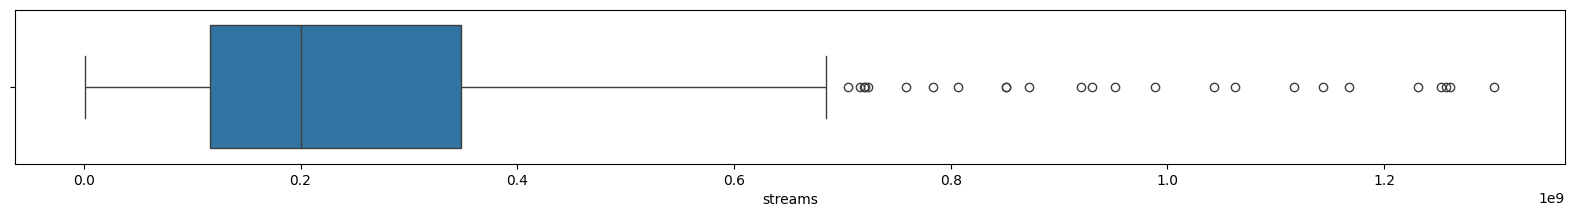

In [85]:
# Mengecek Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df_noid_outlier_clean, x=df_noid_outlier_clean['streams'])

In [86]:
df_noid_outlier_clean['streams'].max()

1301799902.0

Dapat diketahui dari boxplot di atas, bahwa outliers pada dataset sudah berkurang karena data di atas batas maksimum dihapus dari dataset. Namun, dari boxplot dapat dilihat bahwa terdapat sedikit outliers karena batas atas dan IQR dari dataset pada df_noid_outlier_clean berubah. Mari kita cek ada berapa outliers yang tersisa

In [87]:
q1 = df_noid_outlier_clean['streams'].quantile(0.25)
q3 = df_noid_outlier_clean['streams'].quantile(0.75)
iqr = q3-q1
iqr

231341625.0

In [88]:
batas_atas = q3 + 1.5 * iqr
batas_atas

695029799.75

In [89]:
jml_outliers = (df_noid_outlier_clean['streams'] > batas_atas).sum()
print(jml_outliers)

25


In [90]:
persentase_outliers = jml_outliers / df_noid_outlier_clean.shape[0] * 100
print(persentase_outliers)

6.345177664974619


### Scaling 
#### Melakukan Normalisasi/MinMax scaling dengan library sci-kit learn

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['streams', 'bpm', 'danceability_%']])

In [92]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
# Mengevaluasi Hasil Scaling
numerical_col = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_col = numerical_col[1:-2]  # Sesuaikan dengan kolom numerik yang ingin di-scaling

In [94]:
# Normalisasi/MinMax Scaler
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[numerical_col])
minmax_df = pd.DataFrame(minmax_df, columns=numerical_col)

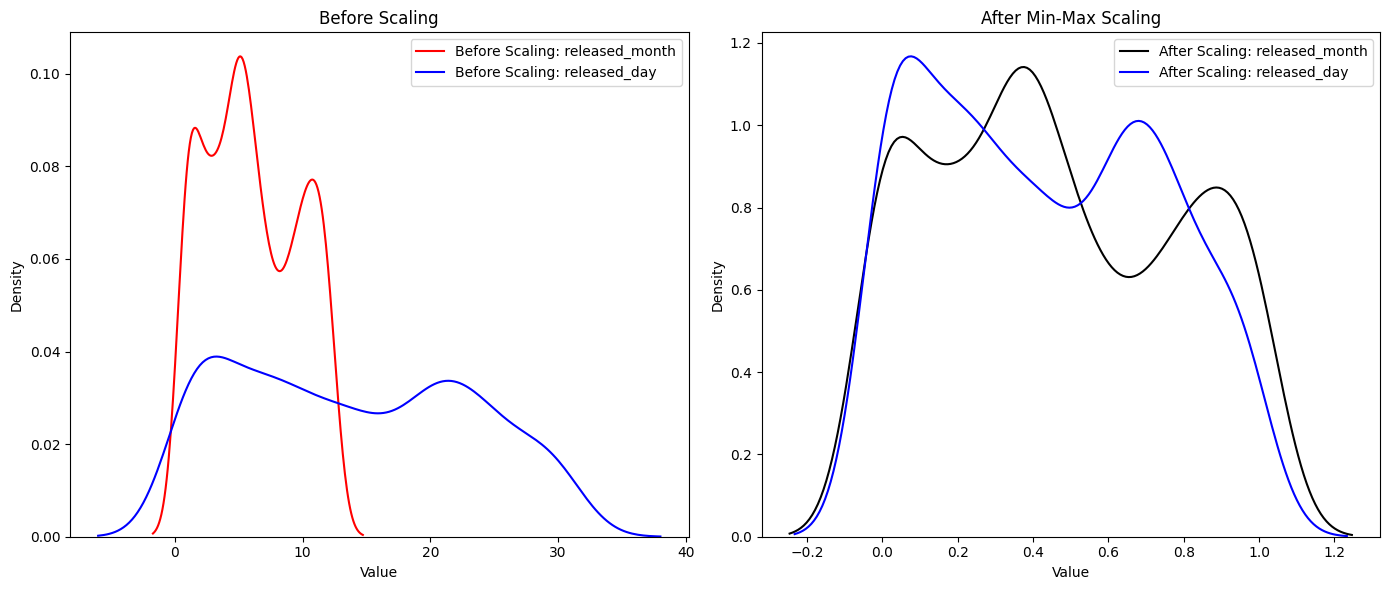

In [95]:
# Membuat dua subplot: Before dan After Scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Before Scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(df[numerical_col[0]], ax=axes[0], color='r', label=f"Before Scaling: {numerical_col[0]}")
sns.kdeplot(df[numerical_col[1]], ax=axes[0], color='b', label=f"Before Scaling: {numerical_col[1]}")
axes[0].legend()

# Plot After Scaling
axes[1].set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df[numerical_col[0]], ax=axes[1], color='black', label=f"After Scaling: {numerical_col[0]}")
sns.kdeplot(minmax_df[numerical_col[1]], ax=axes[1], color='blue', label=f"After Scaling: {numerical_col[1]}")
axes[1].legend()

# Menambahkan label pada setiap subplot
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()  # Untuk menghindari overlap
plt.show()

Nilai CV (Coefficient of Variation) adalah ukuran statistik yang digunakan untuk mengukur tingkat variasi relatif dari sebuah distribusi data. CV menggambarkan seberapa besar variasi data dalam persentase terhadap rata-rata data.

CV menghasilkan nilai dalam bentuk persentase. Semakin tinggi nilai CV, semakin besar variasi relatif dalam distribusi data. Nilai CV yang lebih kecil menunjukkan tingkat variasi yang lebih rendah, sedangkan nilai CV yang lebih tinggi menunjukkan tingkat variasi yang lebih tinggi.

In [96]:
import numpy as np

# CV before scaling
cv_before_scaling = np.std(df[numerical_col]) / df[numerical_col].mean(axis=0)

# CV after scaling
cv_minmax = np.std(minmax_df[numerical_col]) / df[numerical_col].mean(axis=0)

print('CV Before Scaling:\n', cv_before_scaling)
print('-'*70)
print('CV After Min-Max Scaling:\n', cv_minmax)
print('-'*70)

CV Before Scaling:
 released_month          0.590788
released_day            0.660203
in_spotify_playlists    1.517937
in_spotify_charts       1.629194
streams                 1.100855
in_apple_playlists      1.274050
in_apple_charts         0.974859
in_deezer_playlists     1.483926
in_deezer_charts        2.262459
in_shazam_charts        2.325101
bpm                     0.228848
danceability_%          0.218352
valence_%               0.456304
energy_%                0.257344
acousticness_%          0.960260
instrumentalness_%      5.315417
liveness_%              0.752431
dtype: float64
----------------------------------------------------------------------
CV After Min-Max Scaling:
 released_month          5.370797e-02
released_day            2.200677e-02
in_spotify_playlists    2.871238e-05
in_spotify_charts       1.108295e-02
streams                 2.972158e-10
in_apple_playlists      1.895908e-03
in_apple_charts         3.544942e-03
in_deezer_playlists     1.537747e-03
in_deezer_

### Pelabelan Data
#### Label Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategori
cat_col = ['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']

# Buat objek LabelEncoder
le = LabelEncoder()

# Lakukan Label Encoding pada kolom kategori
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [98]:
# Cek hasil
df[cat_col].head()

,track_name,artist(s)_name,in_deezer_playlists,in_shazam_charts,key,mode
0,687,326,98,179,2,0
1,397,401,58,158,3,0
2,936,431,88,182,7,0
3,170,558,110,171,3,0
4,864,43,84,160,0,1


### Train-Test Split

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
X = df.drop(['streams'], axis=1)  
y = df['streams']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(762, 23) (191, 23) (762,) (191,)


In [102]:
# Define the evaluation function for metrics (MSE, RMSE, R2)
def evaluate_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, print_metric=True):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    if print_metric:
        print(f'''On training set:\nMSE: {mse_train}    RMSE: {rmse_train}    R^2: {r2_train}\n
=====================================\nOn test set:\nMSE: {mse_test}    RMSE: {rmse_test}    R^2: {r2_test}''')
    
    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

# Data Modeling

## Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
# Membangun model Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [104]:
# Evaluasi model Linear Regression
_ ,_ ,_ ,mse, rmse, r2 = evaluate_model(lin_reg)

On training set:
MSE: 8.381555291956525e+16    RMSE: 289509158.6108551    R^2: 0.7422716479072777

On test set:
MSE: 6.241618300414693e+16    RMSE: 249832309.76826623    R^2: 0.7927958067473738


In [105]:
# Menyimpan hasil evaluasi ke dalam DataFrame
results_df = pd.DataFrame([['Linear Regression', mse, rmse, r2]], columns=['Model', 'MSE', 'RMSE', 'R²'])
results_df

,Model,MSE,RMSE,R²
0,Linear Regression,6.241618e+16,2.498323e+08,0.792796


## Polynomial Regression

In [146]:
from sklearn.preprocessing import PolynomialFeatures

# Menentukan degree dari Polynomial Regression yang akan dicoba
degree = [2, 3, 4, 5]
results = []

# Mencoba masing-masing degree dan mengevaluasi performa model
for d in degree:
    poly_feat = PolynomialFeatures(degree=d)
    X_poly = poly_feat.fit_transform(X)  # Transformasi fitur dengan PolynomialFeatures
    Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    
    # Linear Regression untuk data yang telah ditransformasikan
    poly_reg = LinearRegression()
    poly_reg.fit(Xp_train, yp_train)

    # Evaluasi model
    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(poly_reg, Xp_train, yp_train, Xp_test, yp_test, print_metric=False)
    
    # Menyimpan hasil evaluasi untuk setiap degree
    results.append([d, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])

# Menyimpan hasil evaluasi ke dalam DataFrame
poly_results = pd.DataFrame(results, columns=['degree', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
poly_results

,degree,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,2,2.432875e+16,1.559768e+08,0.92519,1.113199e+17,3.336464e+08,0.630449
1,3,1.018148e-01,3.190843e-01,1.00000,3.621832e+18,1.903111e+09,-11.023465
2,4,6.896386e+00,2.626097e+00,1.00000,3.506250e+20,1.872498e+10,-1162.976666
3,5,2.288519e+01,4.783847e+00,1.00000,9.055944e+22,3.009310e+11,-300630.901980


In [147]:
# Memilih model dengan degree terbaik (misalnya degree 2)
best_degree = 2
poly_feat_best = PolynomialFeatures(degree=best_degree)
X_poly_best = poly_feat_best.fit_transform(X)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly_best, y, test_size=0.2, random_state=0)

# Membuat dan melatih model Polynomial Regression dengan degree 2
polynomial_model = LinearRegression()
polynomial_model.fit(Xp_train, yp_train)

# Evaluasi model dengan degree 2
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(polynomial_model, Xp_train, yp_train, Xp_test, yp_test, print_metric=True)

On training set:
MSE: 2.432874993934732e+16    RMSE: 155976760.89516452    R^2: 0.9251903923325401

On test set:
MSE: 1.1131993328777827e+17    RMSE: 333646419.5638525    R^2: 0.6304490941348054


In [148]:
# Menyimpan hasil terbaik ke results_df dengan pd.concat
results_model = pd.DataFrame([['Polynomial Regression', *poly_results[poly_results['degree'] == best_degree].iloc[:,4:].values[0]]], columns=['Model', 'MSE', 'RMSE', 'R^2'])

# Menggunakan pd.concat untuk menambahkan hasil ke results_df
results_df = pd.concat([results_df, results_model], ignore_index=True)

# Menampilkan hasil perbandingan model
results_df

,Model,MSE,RMSE,R²,R^2
0,Linear Regression,6.241618e+16,2.498323e+08,0.792796,NaN
1,Polynomial Regression,1.113199e+17,3.336464e+08,NaN,0.630449
2,Polynomial Regression,1.113199e+17,3.336464e+08,NaN,0.630449


## Random Forest Regressor
Menerapkan konsep fine tuning untuk mencari parameter yang cocok (fit) untuk model. Adapun parameter yang dicari adalah n_estimators dan max_leaf_nodes.

In [149]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Definisikan parameter yang akan dicari
n_estimators = [10, 30, 100, 300, 1000, 3000]
max_leaf_nodes = [10, 30, 50, 75, 100]

# Menyimpan hasil evaluasi
results = []

# Fine-tuning dengan mencari parameter terbaik
for est in n_estimators:
    for n_nodes in max_leaf_nodes:
        # Membangun model RandomForestRegressor
        for_reg = RandomForestRegressor(n_estimators=est, max_leaf_nodes=n_nodes, random_state=0)
        for_reg.fit(X_train, y_train)
        
        # Evaluasi model
        mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(for_reg, print_metric=False)
        
        # Simpan hasil ke dalam list
        results.append([est, n_nodes, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])

# Konversi hasil ke DataFrame
for_results_df = pd.DataFrame(results, columns=['n_estimators', 'n_nodes', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
for_results_df

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,10,10,4.670102e+16,2.161042e+08,0.856397,5.749935e+16,2.397902e+08,0.809118
1,10,30,2.483456e+16,1.575899e+08,0.923635,5.347453e+16,2.312456e+08,0.822480
2,10,50,1.747109e+16,1.321783e+08,0.946277,5.007922e+16,2.237839e+08,0.833751
3,10,75,1.386412e+16,1.177460e+08,0.957369,4.832275e+16,2.198244e+08,0.839582
4,10,100,1.260851e+16,1.122876e+08,0.961230,4.752562e+16,2.180037e+08,0.842228
5,30,10,4.580180e+16,2.140136e+08,0.859162,5.813509e+16,2.411122e+08,0.807008
6,30,30,2.275807e+16,1.508578e+08,0.930020,5.281269e+16,2.298101e+08,0.824677
7,30,50,1.580052e+16,1.257001e+08,0.951414,5.254152e+16,2.292194e+08,0.825577
8,30,75,1.218439e+16,1.103829e+08,0.962534,5.140244e+16,2.267211e+08,0.829358
9,30,100,1.074829e+16,1.036740e+08,0.966950,5.157886e+16,2.271098e+08,0.828773


In [150]:
max_r2 = max(for_results_df['r2_test'])
for_results_df[for_results_df['r2_test']==max_r2]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
4,10,100,1.260851e+16,1.122876e+08,0.96123,4.752562e+16,2.180037e+08,0.842228


In [151]:
min_rmse = min(for_results_df['rmse_test'])
for_results_df[for_results_df['rmse_test']==min_rmse]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
4,10,100,1.260851e+16,1.122876e+08,0.96123,4.752562e+16,2.180037e+08,0.842228


Maka didapatkan parameter yang cocok untuk model Random Forest adalah n_estimators = 10 dan max_leaf_nodes = 100

In [152]:
# Membangun model RandomForestRegressor terbaik
randomforest_model = RandomForestRegressor(n_estimators=10, max_leaf_nodes=100, random_state=0)
randomforest_model.fit(X_train, y_train)
# Evaluasi model terbaik
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(randomforest_model, print_metric=True)

On training set:
MSE: 1.2608507931376158e+16    RMSE: 112287612.54642543    R^2: 0.9612295110118751

On test set:
MSE: 4.752561930312383e+16    RMSE: 218003713.96635386    R^2: 0.8422282950900579


In [153]:
# Tambahkan hasil evaluasi model ke dalam DataFrame untuk perbandingan
results_model_2 = pd.DataFrame([['Random Forest', mse_test, rmse_test, r2_test]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
results_df = pd.concat([results_df, results_model_2], ignore_index=True)
results_df

,Model,MSE,RMSE,R²,R^2
0,Linear Regression,6.241618e+16,2.498323e+08,0.792796,NaN
1,Polynomial Regression,1.113199e+17,3.336464e+08,NaN,0.630449
2,Polynomial Regression,1.113199e+17,3.336464e+08,NaN,0.630449
3,Random Forest,4.752562e+16,2.180037e+08,NaN,0.842228


Dapat dilihat bahwa model Random Forest menghasilkan nilai R2 tertinggi dan juga menghasilkan nilai MSE maupun nilai RMSE yang rendah.

### Prediksi

In [156]:
#Predicting the charges
y_test_pred_poly = polynomial_model.predict(Xp_test)
y_test_pred_for = randomforest_model.predict(X_test)
y_test_pred_lin = lin_reg.predict(X_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted Polynomial': y_test_pred_poly,'Predicted Random Forest': y_test_pred_for,'Predicted Linear Regression': y_test_pred_lin})
df   

,Actual,Predicted Polynomial,Predicted Random Forest,Predicted Linear Regression
875,8.592499e+07,-1.088907e+08,1.449002e+08,1.495943e+08
569,2.614142e+08,2.511957e+08,2.137863e+08,2.108669e+08
249,1.454584e+08,1.535163e+08,1.440749e+08,1.510046e+08
331,1.361425e+09,1.624712e+09,1.327489e+09,1.005527e+09
493,4.926296e+07,1.368867e+08,8.103378e+07,2.080492e+08
...,...,...,...,...
485,5.687069e+07,1.273009e+08,8.103378e+07,1.197072e+08
680,6.471457e+07,2.103184e+07,1.414722e+08,1.580672e+08
332,1.497782e+08,4.940930e+08,1.822735e+08,3.649519e+08
883,1.707328e+08,3.461684e+08,2.122174e+08,3.391814e+08


Hasil dari komparasi dari beberapa model yang digunakan, terbukti bahwa model Random Forest paling mendekati nilai sebenarnya (nilai aktual), maka dari itu model Random Forest yang digunakan.